<h1>Kaggle Competition: Customer Churn Prediction 2020</h1>

<img src="img.jpg"
     alt="Markdown Monster icon"
     style="height: 400px; margin-right: 150px;" />

<h3>Alexandre Rosseto Lemos</h3>
<h3>Date: May, 2021</h3>

<h2>Problem Overview</h2>

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Semper feugiat nibh sed pulvinar proin gravida hendrerit. Justo eget magna fermentum iaculis eu non diam. Aenean pharetra magna ac placerat vestibulum. Senectus et netus et malesuada fames ac turpis egestas integer. Fusce ut placerat orci nulla pellentesque dignissim enim sit amet. Diam sollicitudin tempor id eu. Quam elementum pulvinar etiam non quam lacus. Maecenas accumsan lacus vel facilisis volutpat est. Integer quis auctor elit sed vulputate. Sit amet venenatis urna cursus eget nunc scelerisque viverra.

Faucibus pulvinar elementum integer enim neque volutpat ac. Id eu nisl nunc mi ipsum faucibus vitae aliquet. Rhoncus aenean vel elit scelerisque mauris pellentesque pulvinar pellentesque habitant. Venenatis cras sed felis eget velit aliquet sagittis id. Hendrerit dolor magna eget est lorem ipsum dolor. Duis ut diam quam nulla porttitor. Congue eu consequat ac felis donec. Vestibulum sed arcu non odio. Feugiat pretium nibh ipsum consequat nisl vel. Maecenas pharetra convallis posuere morbi. Augue interdum velit euismod in pellentesque. Tortor pretium viverra suspendisse potenti nullam ac tortor vitae. Nunc non blandit massa enim.

<h2>Data information</h2>

File descriptions

- train.csv - the training set: Contains 4250 lines with 20 columns. 3652 samples (85.93%) belong to class churn=no and 598 samples (14.07%) belong to class churn=yes
- test.csv - the test set: Contains 750 lines with 20 columns: the index of each sample and the 19 features (missing the target variable "churn").

Data fields

- state, string. 2-letter code of the US state of customer residence
- account_length, numerical. Number of months the customer has been with the current telco provider
- area_code, string="area_code_AAA" where AAA = 3 digit area code.
- international_plan, (yes/no). The customer has international plan.
- voice_mail_plan, (yes/no). The customer has voice mail plan.
- number_vmail_messages, numerical. Number of voice-mail messages.
- total_day_minutes, numerical. Total minutes of day calls.
- total_day_calls, numerical. Total number of day calls.
- total_day_charge, numerical. Total charge of day calls.
- total_eve_minutes, numerical. Total minutes of evening calls.
- total_eve_calls, numerical. Total number of evening calls.
- total_eve_charge, numerical. Total charge of evening calls.
- total_night_minutes, numerical. Total minutes of night calls.
- total_night_calls, numerical. Total number of night calls.
- total_night_charge, numerical. Total charge of night calls.
- total_intl_minutes, numerical. Total minutes of international calls.
- total_intl_calls, numerical. Total number of international calls.
- total_intl_charge, numerical. Total charge of international calls
- number_customer_service_calls, numerical. Number of calls to customer service
- churn, (yes/no). Customer churn - target variable.

In [1]:
# Initializing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<h2>Data Overview</h2>

In [2]:
# Loading the data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
# Preview of the training set
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
# Preview of the test set
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [5]:
# Training set general information
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [6]:
# Training set statistical information
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
# Test set general information
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [8]:
# Test set statistical information
df_test.describe()

,id,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,375.50000,100.385333,8.454667,180.454933,100.721333,30.677920,203.258267,100.273333,17.277080,199.619467,100.370667,8.982827,10.294133,4.485333,2.779933,1.634667
std,216.65064,39.699029,14.123712,53.258337,19.718539,9.053756,52.185471,19.367535,4.435638,51.531351,19.185238,2.318920,2.770340,2.421901,0.747704,1.276207
min,1.00000,1.000000,0.000000,12.500000,39.000000,2.130000,31.200000,37.000000,2.650000,50.900000,12.000000,2.290000,0.000000,0.000000,0.000000,0.000000
25%,188.25000,74.000000,0.000000,146.625000,88.000000,24.925000,166.800000,87.000000,14.177500,164.475000,88.000000,7.402500,8.525000,3.000000,2.305000,1.000000
50%,375.50000,101.000000,0.000000,178.200000,101.000000,30.295000,203.350000,101.000000,17.285000,199.450000,100.500000,8.975000,10.300000,4.000000,2.780000,1.000000
75%,562.75000,126.000000,21.000000,215.975000,114.000000,36.715000,235.975000,113.000000,20.057500,234.800000,113.000000,10.565000,12.100000,6.000000,3.270000,2.000000
max,750.00000,238.000000,51.000000,350.800000,163.000000,59.640000,363.700000,164.000000,30.910000,364.300000,168.000000,16.390000,18.900000,19.000000,5.100000,6.000000


<h3>Observations:</h3>

- There are no null values in the sets
- Need to transform some columns to numbers
- For this first analysis, the state column will be disconsidered

<h2>Data Transformation</h2>

- Remove unnecessary columns
- Transform categorical data in numeric representations

In [9]:
# Removing the "state", "area_code" and "id" columns
df_train_2 = df_train.drop(["state","area_code"], axis = 'columns')
df_test_2 = df_test.drop(["state","area_code","id"], axis = 'columns')

In [10]:
# Transforming the categorical data into numbers:
# no-> 0 
# yes -> 1
df_train_final = df_train_2.replace(["yes","no"],[1,0])
df_test_final = df_test_2.replace(["yes","no"],[1,0])

<h2>Visualization</h2>

- Distribution of the classes in our training set
- Mean and Standard deviation for each churn set
- Categorical data distribuition for each churn set
- Correlation between columns

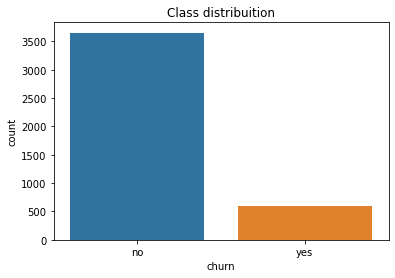

In [11]:
# Class distribution
plt.figure()
plt.title("Class distribuition")
_ = sns.countplot(x = "churn", data = df_train)

<h3>Analysing numerical variables for each class</h3>


In [12]:
# Creating two different sets to analyse each class separately
df_churn_yes = df_train_final[df_train_final["churn"] == 1]
df_churn_yes = df_churn_yes.drop(["churn"],axis = "columns")
df_churn_no = df_train_final[df_train_final["churn"] == 0]
df_churn_no = df_churn_no.drop(["churn"],axis = "columns")

In [212]:
def create_hbargraph(ax, df, x_variable, title):
    '''
    Info: Create a horizontal bargraph with personalizes properties
    Input:
    ax - Figure ax (type: matplotlib axes)
    df - Dataframe used (type: pandas dataframe)
    x_variable - column name analysed (type: str)
    title - Graph title (type: str)
    -----------------------------
    Returns:
    Plots the graph
    '''
    # Creating the horizontal barplot
    graph = sns.barplot(ax=ax,x = df[x_variable], y = df.index, ci=None, orient = 'h')
    
    # Setting the title
    _ = ax.set_title(title)
    

def create_bargraph(ax, df, analysis, labels, title):
    '''
    Info: Create a bargraph with personalized properties  
    Input: 
    ax - Figure ax (type: matplotlib axes)
    df - Dataframe used (type: pandas dataframe)
    analysis - Type of analysis that defines the graph (type: str)
    labels (2x2 Tuple) - X an Y label names (type: str)
    title - Graph title (type: str)
    -----------------------------
    Returns:
    Plots the graph
    '''
    
    # Fontsize used for each element
    label_fontsize, tick_fontsize, title_fontsize, value_fontsize = 16, 14, 16, 16
    
    # Creating the barplot
    graph = sns.barplot(ax=ax, x=analysis, y=analysis, data=df, estimator=lambda x: len(x) / len(df) * 100)
    
    # Configuring elements of the graph
    _ = ax.set_title(title, fontsize=title_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    ax.set_xlabel(labels[0], fontsize=label_fontsize)
    ax.set_ylabel(labels[1], fontsize=label_fontsize)

    # Creating the labels
    for p in graph.patches:
        graph.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                ha='center', va='bottom', size = value_fontsize,
                color= 'black')

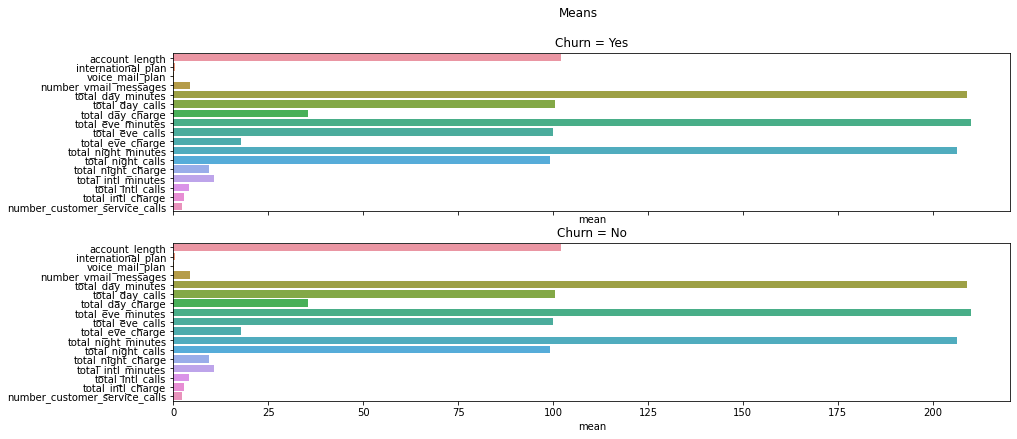

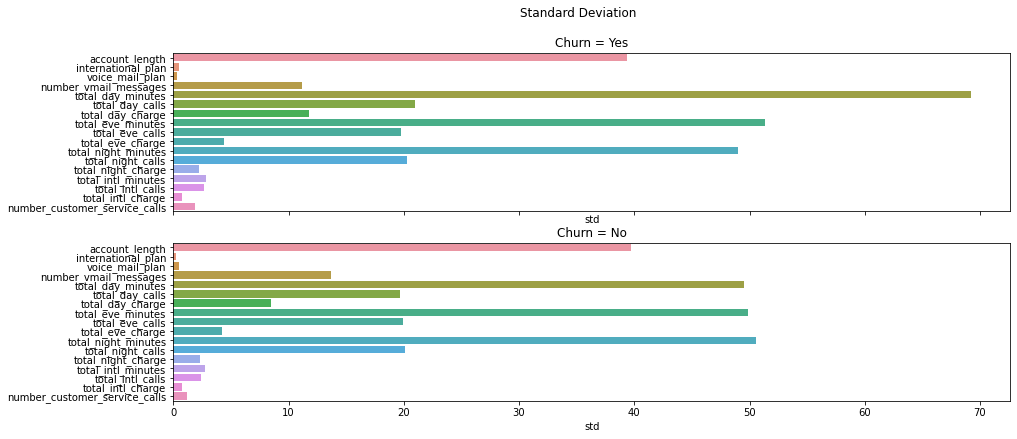

In [216]:
# Creating sets with the mean of the variables
# Mean
churn_yes_mean = pd.DataFrame(df_churn_yes.describe().loc['mean'])
churn_no_mean = pd.DataFrame(df_churn_no.describe().loc['mean'])

# Standar deviation
churn_yes_std = pd.DataFrame(df_churn_yes.describe().loc['std'])
churn_no_std = pd.DataFrame(df_churn_no.describe().loc['std'])

# Creating the figures
# Figure 1
fig, (ax1,ax2) = plt.subplots(2, sharex=True, figsize=(15, 6.4))
fig.suptitle('Means')

# Figure 2
fig2, (ax3,ax4) = plt.subplots(2, sharex=True, figsize=(15, 6.4))
fig2.suptitle('Standard Deviation')

# Plotting the graphs for each set
create_hbargraph(ax1, churn_yes_mean, 'mean', 'Churn = Yes')
create_hbargraph(ax2, churn_yes_mean, 'mean', 'Churn = No')
create_hbargraph(ax3, churn_yes_std, 'std', 'Churn = Yes')
create_hbargraph(ax4, churn_no_std, 'std', 'Churn = No')

<h3>Analysing categorical variables for each class</h3>

- voice_mail_plan

- international_plan

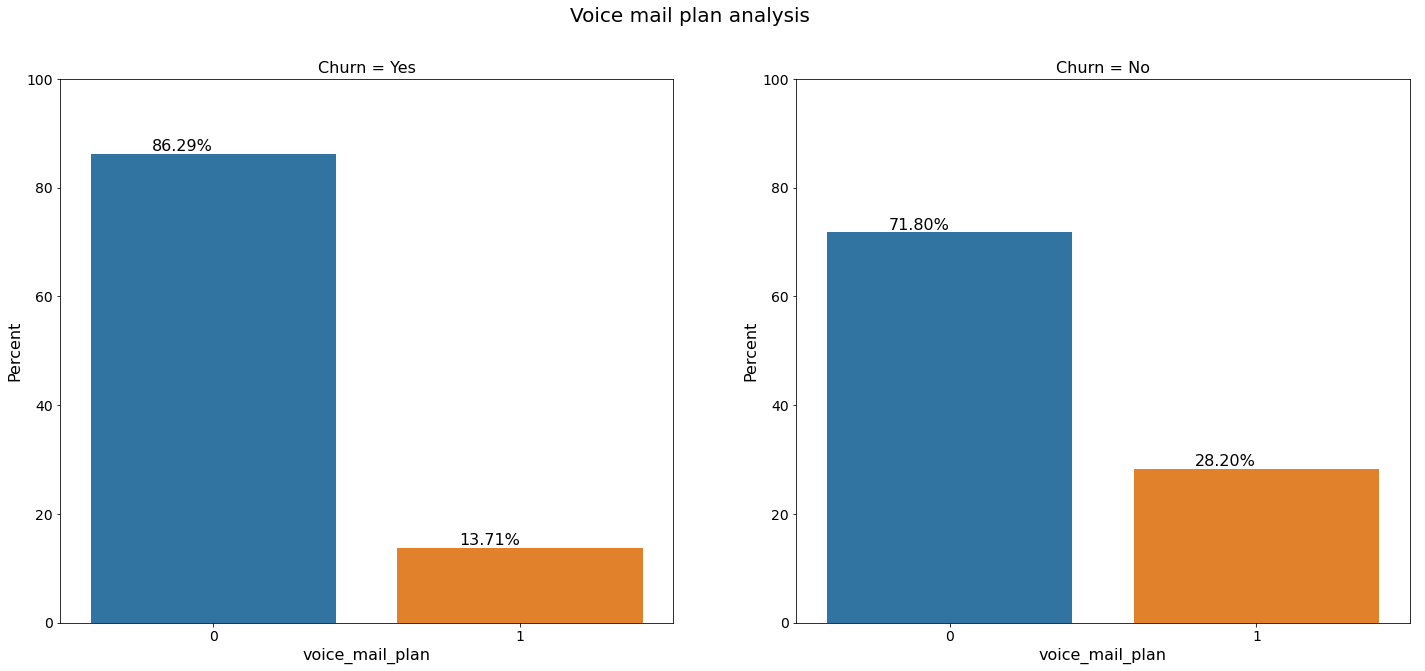

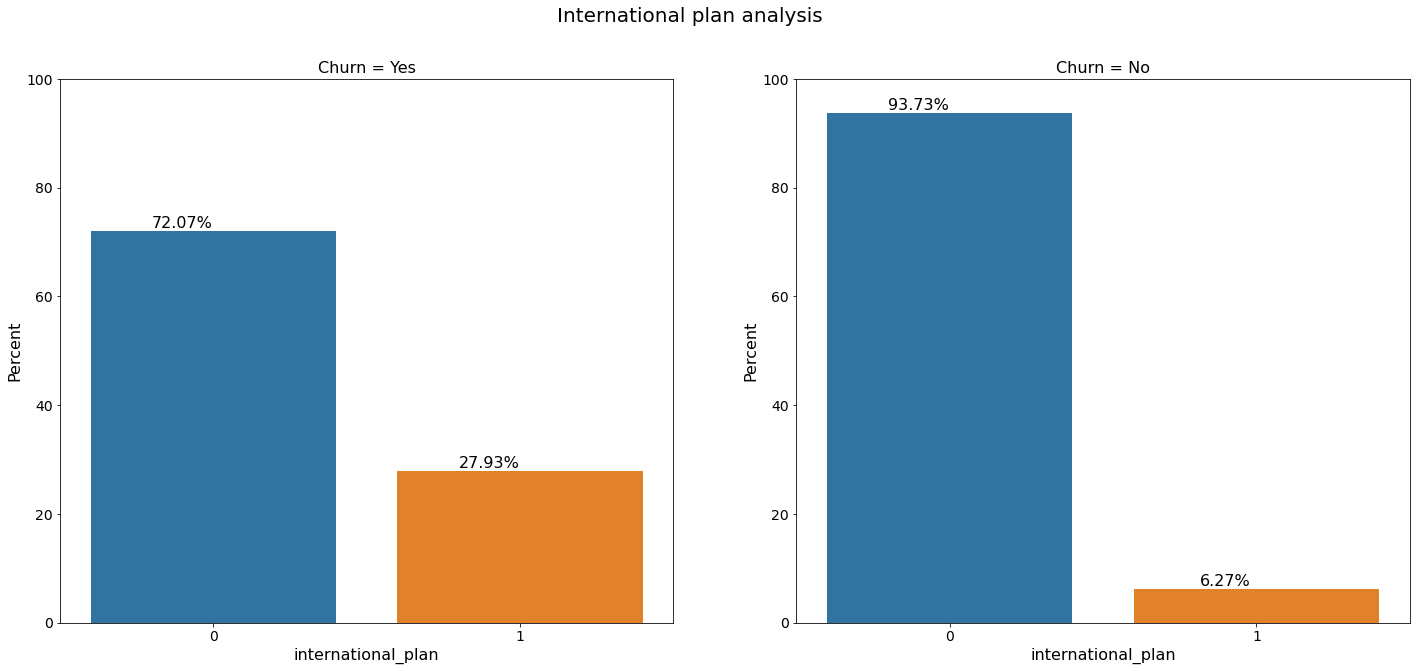

In [217]:
# Creating and configuring the two figures
# Figure 1
# Voice_mail_plan analysis where:
# 0 -> don't have boice_mail plan
# 1 -> have voice_mail plan
fig1 = plt.figure(figsize = [10,10])
ax = fig1.add_subplot(111)    # The big subplot
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)
plt.subplots_adjust(right = 2)
fig1.suptitle('Voice mail plan analysis', x = 1, fontsize=20)
ax1.set_ylim([0,100])
ax2.set_ylim([0,100])

# Removing the frames of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# Figure 2
# International_plan analysis where:
# 0 -> don't have internationa plan
# 1 -> have international plan
fig2 = plt.figure(figsize = [10,10])
ax_ = fig2.add_subplot(111)    # The big subplot
ax3 = fig2.add_subplot(121)
ax4 = fig2.add_subplot(122)
plt.subplots_adjust(right = 2)
fig2.suptitle('International plan analysis', x = 1, fontsize=20)
ax3.set_ylim([0,100])
ax4.set_ylim([0,100])

# Removing the frames of the big subplot
ax_.spines['top'].set_color('none')
ax_.spines['bottom'].set_color('none')
ax_.spines['left'].set_color('none')
ax_.spines['right'].set_color('none')
ax_.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# Creating the graphs for each ax
create_bargraph(ax1, df_churn_yes, "voice_mail_plan",("voice_mail_plan", "Percent"), 'Churn = Yes')
create_bargraph(ax2, df_churn_no, "voice_mail_plan",("voice_mail_plan", "Percent"), 'Churn = No')
create_bargraph(ax3, df_churn_yes, "international_plan",("international_plan", "Percent"), 'Churn = Yes')
create_bargraph(ax4, df_churn_no, "international_plan",("international_plan", "Percent"), 'Churn = No')


<h3>Analysing the correlation between the variables</h3>

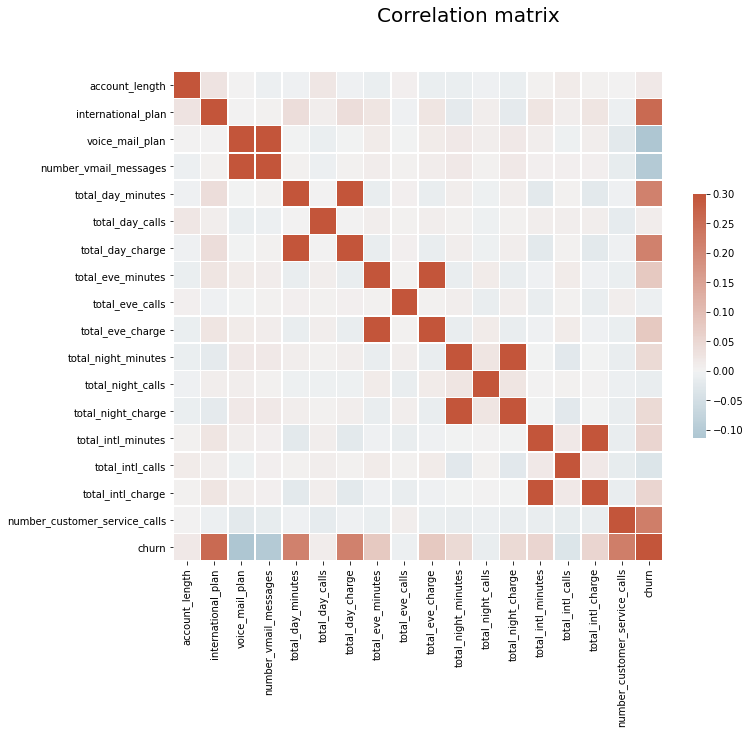

In [223]:
# Correlation matrix
corr = df_train_final.corr()

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
f.suptitle('Correlation matrix', fontsize=20)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(corr, 
                #mask=mask, 
                cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<h3>Observations</h3>

- The presence of outliers was not analysed

- The dataset is unbalanced: there are more registers where churn = no
- The variable "total_day_minutes" has significantly higher mean and std values in the set where churn = yes
- It is more likely that churn = no if voice_plan_mail = yes
- It is more likely that churn = no if internation_plan = no

- The variables that are more correlated with the churn are: 
    - number_customer_service_calls
    - total_day_charge
    - total_day_minutes
    - international_plan
    


<h2>Further Analysis</h2>

- Using one-hot encoder to represent the states

In [95]:
df_train_final.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
